In [88]:
import requests
import random
import json
import base64
from IPython.display import display, SVG

In [89]:
baseUrl = "http://demo-admin-portal.sunbirdrc.oci/registry"
apibaseUrl = "http://demo-admin-portal.sunbirdrc.oci/registry/api/v1/"
keycloakUrl = "http://demo-admin-portal.sunbirdrc.oci"
keycloak_url = "http://demo-admin-portal.sunbirdrc.oci"

#### Registry Health Check

In [92]:
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("GET", baseUrl + "/health", headers=headers)

print(json.dumps(response.json(), indent=4))
assert response.status_code == 200

{
    "id": "sunbird-rc.registry.health",
    "ver": "1.0",
    "ets": 1690245585966,
    "params": {
        "resmsgid": "",
        "msgid": "a1b83bb2-8684-4b82-a682-95d25d22ab50",
        "err": "",
        "status": "SUCCESSFUL",
        "errmsg": ""
    },
    "responseCode": "OK",
    "result": {
        "name": "sunbirdrc-registry-api",
        "healthy": true,
        "checks": [
            {
                "name": "sunbird.notification.service",
                "healthy": true,
                "err": "NOTIFICATION_ENABLED",
                "errmsg": "false"
            },
            {
                "name": "sunbird.certificate-api.service",
                "healthy": true,
                "err": "",
                "errmsg": ""
            },
            {
                "name": "sunbird.encryption.service",
                "healthy": true,
                "err": "ENCRYPTION_ENABLED",
                "errmsg": "false"
            },
            {
                "name": 

#### admin token generation

In [94]:
# For admin token generation
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}

userId = 'admin'

data = {
  'client_id': 'registry-frontend',
  'username': userId,
  'password': 'abcd@123',
  'grant_type': 'password'
}
response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloakUrl), headers=headers, data=data)
token = response.json()["access_token"]
print(token)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJFdWc1MU9HMW43UHQyYXVXRWVOdVdUZkVsVTVKOHNsamY5MlR4Z3FvS013In0.eyJleHAiOjE2OTAyNDYyNjMsImlhdCI6MTY5MDI0NTY2MywianRpIjoiNjVhYTk5MTMtNTQyMy00MzY1LWFjOGYtZjVmYzhjNmM1ZmU2IiwiaXNzIjoiaHR0cDovL2RlbW8tYWRtaW4tcG9ydGFsLnN1bmJpcmRyYy5vY2kvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiIwNDcwYzczOC0xMGY1LTQ1MDgtYjdiMC0xYzBiNTAxZWIxN2EiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiIxOGQ0ZGU1NC1kNzBiLTRmNjktYTc1MS01ZDNkNmRiNDg0ZTciLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vZGVtby1hZG1pbi1wb3J0YWwuc3VuYmlyZHJjLm9jaSIsImh0dHA6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHA6Ly8yMC4xOTguNjQuMTI4Il0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsImFkbWluIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLW5kZWFyIl19LCJyZXNvdXJjZV9hY2Nlc3MiOnsiYWNjb3VudCI6eyJyb2xlcyI6WyJtYW5hZ2UtYWNj

#### Create Official

In [95]:
#create issuer
issuerUserId = "rto_official_1"
def createIssuer():
    payload = json.dumps({
      "name": "RTO Karnataka",
      "accountDetails": {
        "userId": issuerUserId
      },
      "contactDetails": {
        "email": issuerUserId
      }
    })
    headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer %s'%token
    }
    response = requests.post('%s/api/v1/Official/invite'%(baseUrl), headers=headers, data=payload)
    return response.json()["result"]['Official']["osid"]

    
issuerId = createIssuer()



#### Get Official/Issuer Token

In [112]:
#get issuer token
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}
issuerUserId = "rto_official_1"
data = {
  'client_id': 'registry-frontend',
  'username': issuerUserId,
  'password': 'abcd@123',
  'grant_type': 'password'
}

response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloakUrl), headers=headers, data=data)
issuerToken = response.json()["access_token"]
print(issuerToken)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJFdWc1MU9HMW43UHQyYXVXRWVOdVdUZkVsVTVKOHNsamY5MlR4Z3FvS013In0.eyJleHAiOjE2OTAyNDY1MzcsImlhdCI6MTY5MDI0NTkzNywianRpIjoiM2ZiZGFmMzgtMDM2Mi00YWM1LTg5ZWQtYTYyOTRjMzMxZjE4IiwiaXNzIjoiaHR0cDovL2RlbW8tYWRtaW4tcG9ydGFsLnN1bmJpcmRyYy5vY2kvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiIxMDVjMGNhOC1kYzZlLTQ3OWEtYjYwYS00ZTMyZjI2OGMzY2EiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiIzM2M4NzQwZi01N2NjLTQyYzQtOTQxMi1hMjE3ZWVkNjU4NzEiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vZGVtby1hZG1pbi1wb3J0YWwuc3VuYmlyZHJjLm9jaSIsImh0dHA6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHA6Ly8yMC4xOTguNjQuMTI4Il0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJPZmZpY2lhbCIsIm9mZmxpbmVfYWNjZXNzIiwiYWRtaW4iLCJ1bWFfYXV0aG9yaXphdGlvbiIsImRlZmF1bHQtcm9sZXMtbmRlYXIiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpb

#### Get official details

In [97]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}

response = requests.request("GET", apibaseUrl + "Official", headers=headers)

print(response.text)
issuerId = response.json()[0]["osid"]
print(issuerId)
assert response.status_code == 200

[{"osUpdatedAt":"2023-07-25T00:41:07.869Z","osCreatedAt":"2023-07-25T00:41:07.869Z","osUpdatedBy":"","contactDetails":{"osid":"1-a2f19391-2855-403a-b7c6-1c25b2bec2ad","osUpdatedAt":"2023-07-25T00:41:07.869Z","osCreatedAt":"2023-07-25T00:41:07.869Z","osUpdatedBy":"","osCreatedBy":"","email":"rto_official_1"},"name":"RTO Karnataka","osCreatedBy":"","osid":"1-2787fa6b-03c5-48e8-8c5a-2db805e98c02","accountDetails":{"osid":"1-1c8e0399-9a0f-4486-8448-931d2920a5ca","osUpdatedAt":"2023-07-25T00:41:07.869Z","osCreatedAt":"2023-07-25T00:41:07.869Z","osUpdatedBy":"","osCreatedBy":"","userId":"rto_official_1"},"osOwner":["105c0ca8-dc6e-479a-b60a-4e32f268c3ca"]}]
1-2787fa6b-03c5-48e8-8c5a-2db805e98c02


#### Upload Certificate Template

In [98]:
def uploadTemplate(entityName, entityId):
    payload = {}
    files=[
      ('files',('registrationcertificate.svg',open('./schema_templates/registrationcertificate.svg','rb'),'image/svg+xml'))
    ]
    headers = {
        'Authorization': 'Bearer %s'%issuerToken
    }
    response = requests.post('%s/api/v1/%s/%s/templates/documents'%(baseUrl, entityName, entityId), headers=headers, data=payload, files=files)
    print(json.dumps(response.json(), indent=4))
    return response.json()['documentLocations'][0]
templateUrl = uploadTemplate('Official', issuerId)

{
    "documentLocations": [
        "Official/1-2787fa6b-03c5-48e8-8c5a-2db805e98c02/templates/documents/7fdf3690-fb56-43be-8b94-2fcad81da765-registrationcertificate.svg"
    ],
    "errors": []
}


In [99]:
# Show template url
print(templateUrl)

Official/1-2787fa6b-03c5-48e8-8c5a-2db805e98c02/templates/documents/7fdf3690-fb56-43be-8b94-2fcad81da765-registrationcertificate.svg


In [100]:
schemaName = "VehicleCertificate"
def getSchemaBody(templateUrl):
    return {
      "name": schemaName,
      "schema": "{\"$schema\":\"http://json-schema.org/draft-07/schema\",\"type\":\"object\",\"properties\":{\"VehicleCertificate\":{\"$ref\":\"#/definitions/VehicleCertificate\"}},\"required\":[\"VehicleCertificate\"],\"title\":\"VehicleCertificate\",\"definitions\":{\"VehicleCertificate\":{\"$id\":\"#/properties/VehicleCertificate\",\"type\":\"object\",\"title\":\"The VehicleCertificate Schema\",\"required\":[\"regnumber\",\"mnfyear\",\"dateofaward\",\"nameofScheme\",\"name\"],\"properties\":{\"name\":{\"type\":\"string\",\"title\":\"Name\"},\"dateofaward\":{\"type\":\"string\",\"title\":\"Date Of Award\",\"format\":\"date\"},\"nameofScheme\":{\"type\":\"string\",\"title\":\"Name of Scheme\"},\"regnumber\":{\"type\":\"string\",\"title\":\"Vehicle Registration Number\"},\"mnfyear\":{\"type\":\"string\",\"title\":\"Manufacturing year\"}}}},\"_osConfig\":{\"uniqueIndexFields\":[],\"privateFields\":[],\"privateFieldConfig\":\"HASH\",\"internalFieldConfig\":\"FULL\",\"systemFields\":[\"osCreatedAt\",\"osUpdatedAt\",\"osCreatedBy\",\"osUpdatedBy\"],\"roles\":[\"Official\"],\"inviteRoles\":[\"anonymous\"],\"credentialTemplate\":{\"@context\":[\"https://www.w3.org/2018/credentials/v1\",\"https://gist.githubusercontent.com/ddevadat/4bb88499cf374f7ba8d1c9138f52eb67/raw/7c62ff3d2af28e1abc6dfcc2c95b89a97c029554/vehiclecertificate_ct.json\"],\"type\":[\"VerifiableCredential\"],\"issuanceDate\":\"{{osCreatedAt}}\",\"credentialSubject\":{\"type\":\"Vehicle\",\"name\":\"{{name}}\",\"mnfyear\":\"{{mnfyear}}\",\"regnumber\":\"{{regnumber}}\"},\"evidence\":{\"type\":\"Registration\",\"nameofScheme\":\"{{nameofScheme}}\",\"dateofaward\":\"{{dateofaward}}\"},\"issuer\":\"did:web:sunbirdrc.dev/vc/Official\"},\"certificateTemplates\":{\"html\":\"minio://%s\"}}}"%(templateUrl),
      "status": "PUBLISHED"
    }

#### Create the VC schema

In [101]:
# create a schema
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer %s'%issuerToken, 
}
entity_name = 'Schema'
data = getSchemaBody(templateUrl)
response = requests.post('%s/api/v1/%s'%(baseUrl, entity_name), headers=headers, json=data)
print(response.status_code)
print(response.json())
schemaOsid = response.json()["result"]['Schema']["osid"]
print(schemaOsid)

200
{'id': 'sunbird-rc.registry.create', 'ver': '1.0', 'ets': 1690245739199, 'params': {'resmsgid': '', 'msgid': '6d110f2a-acfa-44d9-9669-a2cd4d6ae9a7', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}, 'responseCode': 'OK', 'result': {'Schema': {'osid': '1-bfe26838-56d0-49fd-93b2-b1a4735ae4d3'}}}
1-bfe26838-56d0-49fd-93b2-b1a4735ae4d3


#### Onboard Citizen 1

In [102]:
### Code for inviting citizen

citizenUserId = "zcrawley@gmail.com"
citizenRequestBody = {
    "name": "Zak Crawley",
    "email": citizenUserId,
    "dob": "2000-10-10",
    "gender": "Male"
}

headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", apibaseUrl + "CitizenV2/invite", headers=headers, json=citizenRequestBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.invite","ver":"1.0","ets":1690245744355,"params":{"resmsgid":"","msgid":"349da4ec-ca4b-4841-8046-fff1c202ffa7","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK","result":{"CitizenV2":{"osid":"1-0c3cfb31-9569-4d79-b7e7-9b71d6af4aa2"}}}


#### Get Citizen1 Token

In [103]:
def getToken(userId):
    headers = {
        'content-type': 'application/x-www-form-urlencoded',
    }

    data = {
      'client_id': 'registry-frontend',
      'username': userId,
      'password': 'abcd@123',
      'grant_type': 'password'
    }

    response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloakUrl), headers=headers, data=data)
    print(response.status_code)
    citizentoken = response.json()["access_token"]
    return citizentoken

citizen1token = getToken(citizenUserId)
print(citizen1token)

200
eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJFdWc1MU9HMW43UHQyYXVXRWVOdVdUZkVsVTVKOHNsamY5MlR4Z3FvS013In0.eyJleHAiOjE2OTAyNDYzNDgsImlhdCI6MTY5MDI0NTc0OCwianRpIjoiMGUxMTcwNTktY2NiMy00ZWMyLWI3OTItYmE1OWMxNzk4MzJkIiwiaXNzIjoiaHR0cDovL2RlbW8tYWRtaW4tcG9ydGFsLnN1bmJpcmRyYy5vY2kvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiI0NmEyZWQ2ZC1mMDNhLTRjMDctOGU3ZS1iMWZlZjhiMTBmYmYiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiJkNmIyY2NjYS1hNDExLTQ3YTktOWUzMi03ODVlOGU0NjdkMGYiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vZGVtby1hZG1pbi1wb3J0YWwuc3VuYmlyZHJjLm9jaSIsImh0dHA6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHA6Ly8yMC4xOTguNjQuMTI4Il0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1uZGVhciIsIkNpdGl6ZW5WMiJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFu

#### Get Citizen1 Details

In [108]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

print(response.text)
citizen1Osid = response.json()[0]["osid"]
citizen1Name = response.json()[0]["name"]
citizen1Email = response.json()[0]["email"]
print(citizen1Osid)
print(citizen1Name)
print(citizen1Email)
assert response.status_code == 200

[{"osUpdatedAt":"2023-07-25T00:42:24.601Z","gender":"Male","osCreatedAt":"2023-07-25T00:42:24.601Z","osUpdatedBy":"","dob":"2000-10-10","name":"Zak Crawley","osCreatedBy":"","osid":"1-0c3cfb31-9569-4d79-b7e7-9b71d6af4aa2","osOwner":["46a2ed6d-f03a-4c07-8e7e-b1fef8b10fbf"],"email":"zcrawley@gmail.com"}]
1-0c3cfb31-9569-4d79-b7e7-9b71d6af4aa2
Zak Crawley
zcrawley@gmail.com


#### Official Adds Vehicle and assigns to Citizen1

In [114]:
### Code for adding vehicle

vehicleRegNumber = "ECB73D2"
vehicleRequestBody = {
    "regnumber": vehicleRegNumber,
    "mnfyear": "2022",
    "vehicletype": "Car",
    "owner": [
      {
      "citizenOSID": citizen1Osid,
      "citizenName": citizen1Name,
      "citizenEmail": citizen1Email
      }
    ]
}

headers = {
  'Content-Type': 'application/json',
  'Authorization': 'bearer %s'%issuerToken
}

response = requests.request("POST", apibaseUrl + "VehicleV2/invite", headers=headers, json=vehicleRequestBody)

print(response.text)
assert response.status_code == 200


{"id":"sunbird-rc.registry.invite","ver":"1.0","ets":1690246048689,"params":{"resmsgid":"","msgid":"5d3886d3-0079-433f-94f1-a9755fa7a168","err":"","status":"UNSUCCESSFUL","errmsg":"Error occurred"},"responseCode":"OK"}


AssertionError: 

#### Search Vehicle Details by vehicle reg number

In [58]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}
vehicleSearchBody = {
    "filters": {
        "regnumber": {
            "contains": vehicleRegNumber
        }
    },
    "limit": 5,
    "offset": 0
}

response = requests.request("POST", apibaseUrl + "VehicleV2/search", headers=headers,json=vehicleSearchBody)

print(response.text)
vehicleOsid = response.json()[0]["osid"]
print(vehicleOsid)
assert response.status_code == 200

[{"regnumber":"ECB73D2","mnfyear":"2022","vehicletype":"Car","owner":[{"citizenOSID":"1-b0febf21-a937-4086-b7a6-810ed88fa598","citizenName":"Zak Crawley","citizenEmail":"zcrawley@gmail.com","osCreatedAt":"2023-07-24T23:51:21.525Z","osUpdatedAt":"2023-07-24T23:51:21.525Z","osCreatedBy":"","osUpdatedBy":"","osid":"1-dffe5449-df31-44eb-b01f-4fb2c2dd5d46"}],"osCreatedAt":"2023-07-24T23:51:21.525Z","osUpdatedAt":"2023-07-24T23:51:21.525Z","osCreatedBy":"","osUpdatedBy":"","osid":"1-c3640a44-3f22-4f70-b2e9-c1523ee4476a"}]
1-c3640a44-3f22-4f70-b2e9-c1523ee4476a


#### Official Create a VC for Citizen1

In [59]:
# create a credential
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer %s'%issuerToken, 
}
data = {
    "name": "Zak Crawley",
    "regnumber": "ECB73D2",
    "dateofaward": "2023-04-20",
    "nameofScheme": "Vehicle Registration",
    "mnfyear": "2022"

}
response = requests.post('%s/api/v1/%s'%(baseUrl, schemaName), headers=headers, json=data)
print(response.status_code)
credentialOsid = response.json()["result"]['VehicleCertificate']["osid"]
print(credentialOsid)

200
1-b4cef32c-194d-4ef7-a676-250eb65be00e


#### Official Views the Issued VC

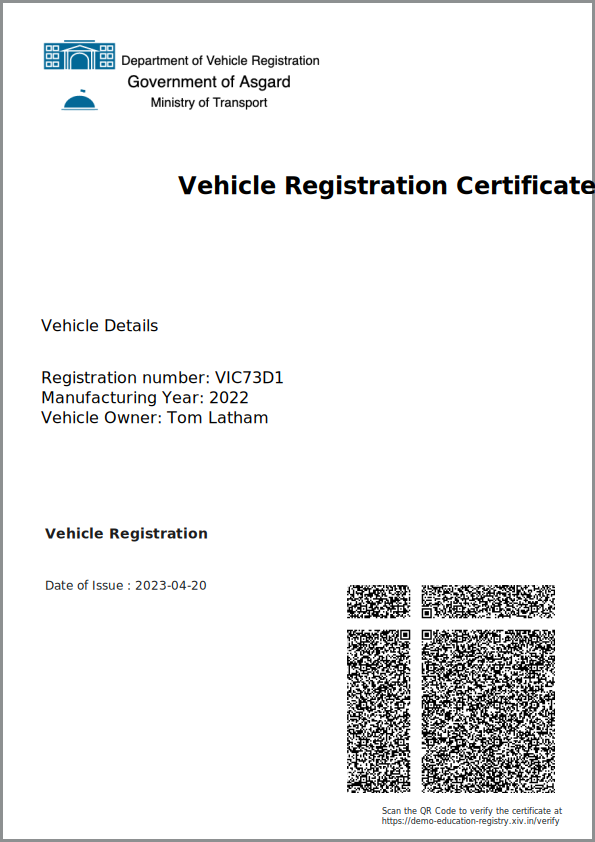

In [72]:
#get a credential
# credentialOsid='1-2ffb8f5c-ec51-47f3-8b26-0796a8328803'
schemaName = "VehicleCertificate"
headers = {
    'Accept': 'image/svg+xml',
    'Authorization': 'Bearer %s'%issuerToken,
    "template-key": "html"
}
response = requests.get('%s/api/v1/%s/%s'%(baseUrl, schemaName, credentialOsid), headers=headers)
display(SVG(response.content))

#### Onboard Citizen 2

In [61]:
## Code for inviting citizen

citizen2UserId = "hbrook@gmail.com"
citizenRequestBody = {
    "name": "Harry Brook",
    "email": citizen2UserId,
    "dob": "2001-10-10",
    "gender": "Male"
}

headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", apibaseUrl + "CitizenV2/invite", headers=headers, json=citizenRequestBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.invite","ver":"1.0","ets":1690242896833,"params":{"resmsgid":"","msgid":"af3f25b0-338d-41c8-a644-38c06bf23243","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK","result":{"CitizenV2":{"osid":"1-3724bcdb-4e42-45e6-a78e-cacdbe02a41e"}}}


#### Get Citizen 2 Token

In [62]:
citizen2token = getToken(citizen2UserId)
print(citizen2token)

200
eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICI4SWpGSkE2VjF3Sm5JbVRLajZuS1pMb093UzJVdmk4T3dsX0huNmFfdjhNIn0.eyJleHAiOjE2OTAyNDM1MjgsImlhdCI6MTY5MDI0MjkyOCwianRpIjoiY2ZlNjQ3NDQtOTM1OC00YjEzLWI2ZGYtNDVlYWE4ZDQxOGM0IiwiaXNzIjoiaHR0cDovL2RlbW8tYWRtaW4tcG9ydGFsLnN1bmJpcmRyYy5vY2kvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiI4NjdjZjI1Ny0wMjdiLTQ3NzAtOTgxOS1mNTk4MTk5YmI5ODUiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiI5NGM2MDU1Ny1iM2Q1LTQyYWItOTk0MS1lZTQwNjJjOTBiMjYiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vZGVtby1hZG1pbi1wb3J0YWwuc3VuYmlyZHJjLm9jaSIsImh0dHA6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHA6Ly8yMC4xOTguNjQuMTI4Il0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1uZGVhciIsIkNpdGl6ZW5WMiJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFu

#### Get Citizen 2 Details

In [63]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen2token
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

print(response.text)
citizen2Osid = response.json()[0]["osid"]
citizen2Name = response.json()[0]["name"]
citizen2Email = response.json()[0]["email"]
print(citizen2Osid)
print(citizen2Name)
print(citizen2Email)
assert response.status_code == 200

[{"osUpdatedAt":"2023-07-24T23:54:57.013Z","gender":"Male","osCreatedAt":"2023-07-24T23:54:57.013Z","osUpdatedBy":"","dob":"2001-10-10","name":"Harry Brook","osCreatedBy":"","osid":"1-3724bcdb-4e42-45e6-a78e-cacdbe02a41e","osOwner":["867cf257-027b-4770-9819-f598199bb985"],"email":"hbrook@gmail.com"}]
1-3724bcdb-4e42-45e6-a78e-cacdbe02a41e
Harry Brook
hbrook@gmail.com


#### Official Transfers vehicle to citizen2

In [66]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}

vehicleUpdateBody = {
    "owner": [
      {
      "citizenOSID": citizen2Osid,
      "citizenName": citizen2Name,
      "citizenEmail": citizen2Email
      }
    ]
}


response = requests.request("PUT", apibaseUrl + "VehicleV2/" + vehicleOsid, headers=headers, json=vehicleUpdateBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.update","ver":"1.0","ets":1690243044553,"params":{"resmsgid":"","msgid":"d16fc06e-bfdd-46e3-93ba-3e4573b0bc40","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK"}


#### Check the owner details is now citizen2

In [67]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}
vehicleSearchBody = {
    "filters": {
        "regnumber": {
            "contains": vehicleRegNumber
        }
    },
    "limit": 5,
    "offset": 0
}

response = requests.request("POST", apibaseUrl + "VehicleV2/search", headers=headers,json=vehicleSearchBody)

print(response.text)
vehicleOsid = response.json()[0]["osid"]
print(vehicleOsid)
assert response.status_code == 200

[{"regnumber":"ECB73D2","mnfyear":"2022","vehicletype":"Car","owner":[{"citizenName":"Harry Brook","osUpdatedAt":"2023-07-24T23:57:24.577Z","citizenOSID":"1-3724bcdb-4e42-45e6-a78e-cacdbe02a41e","osCreatedAt":"2023-07-24T23:51:21.525Z","osUpdatedBy":"f6f876de-75dc-4d0c-adba-8be0086e9400","citizenEmail":"hbrook@gmail.com","osCreatedBy":"","osid":"1-1a0977ae-2e96-43ad-9735-19565a84870e"}],"osCreatedAt":"2023-07-24T23:51:21.525Z","osUpdatedAt":"2023-07-24T23:57:24.577Z","osCreatedBy":"","osUpdatedBy":"f6f876de-75dc-4d0c-adba-8be0086e9400","osid":"1-c3640a44-3f22-4f70-b2e9-c1523ee4476a","@type":"VehicleV2"}]
1-c3640a44-3f22-4f70-b2e9-c1523ee4476a


#### Official Updates VC for citizen2

In [70]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}

VCUpdateBody = {
    "name": "Tom Latham",
    "regnumber": "VIC73D1",
    "dateofaward": "2023-04-20",
    "nameofScheme": "Vehicle Registration",
    "mnfyear": "2022"
}


response = requests.request("PUT", apibaseUrl + "VehicleCertificate/" + credentialOsid, headers=headers, json=VCUpdateBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.update","ver":"1.0","ets":1690243318338,"params":{"resmsgid":"","msgid":"9d20721d-09d5-456e-8bb8-697628a7fb6b","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK"}


#### Official view the new VC

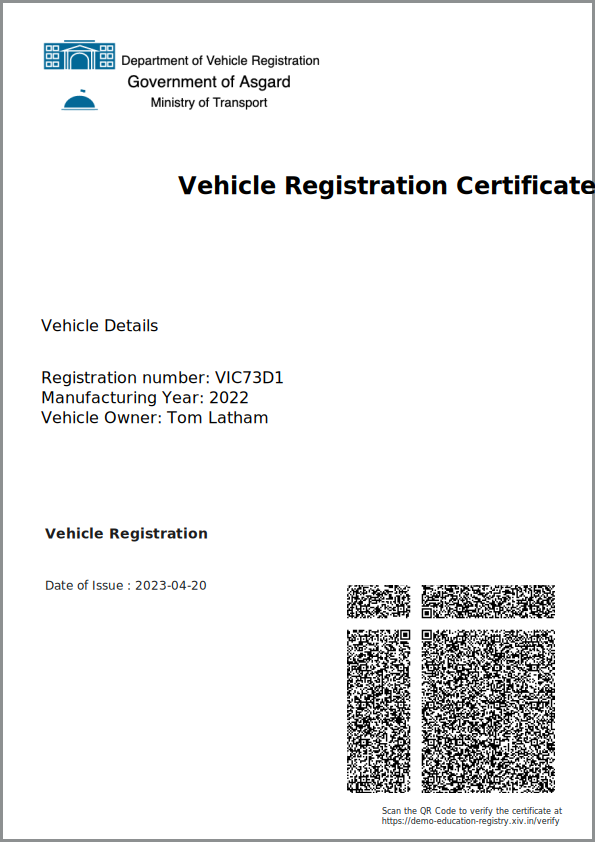

In [73]:
schemaName = "VehicleCertificate"
headers = {
    'Accept': 'image/svg+xml',
    'Authorization': 'Bearer %s'%issuerToken,
    "template-key": "html"
}
response = requests.get('%s/api/v1/%s/%s'%(baseUrl, schemaName, credentialOsid), headers=headers)
display(SVG(response.content))

### Optional attestation workflow

##### Citizen 1 adds license details

In [77]:

headers = {
    'content-type': 'application/json',
    'authorization': 'bearer %s'%citizen1token,
}

data = """{
"drivinglicense": [
  {
    "vehicletype": "Car",
    "licnumber": "abcde1234",
    "issueddate":  "2000-10-10",
    "validupto": "2010-10-10",
    "state": "Karnataka"
  }
]
}"""
# print(data)
response = requests.put('%sCitizenV2/%s'%(apibaseUrl, citizen1Osid), headers=headers, data=data)
print(response)
print(response.json())
assert response.status_code == 200


headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token,
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

# print(response.text)
drivinglicenseOsid = response.json()[0]["drivinglicense"][0]["osid"]
print(drivinglicenseOsid)
assert response.status_code == 200


<Response [200]>
{'id': 'sunbird-rc.registry.update', 'ver': '1.0', 'ets': 1690243997703, 'params': {'resmsgid': '', 'msgid': '608a101a-54b0-445a-93cf-de2a8876385b', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}, 'responseCode': 'OK'}
1-f9f598b6-1dbe-4177-aae6-9b72f74e70bc


#### Get Citizen1 details after adding license

In [80]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)
print(json.dumps(response.json(), indent=4))
assert response.status_code == 200

[
    {
        "osUpdatedAt": "2023-07-25T00:13:17.947Z",
        "gender": "Male",
        "osCreatedAt": "2023-07-24T23:49:15.721Z",
        "osUpdatedBy": "7ad0faf8-0297-4410-a5e7-73bc506ecaf7",
        "dob": "2000-10-10",
        "drivinglicense": [
            {
                "vehicletype": "Car",
                "validupto": "2010-10-10",
                "osUpdatedAt": "2023-07-25T00:13:17.947Z",
                "licnumber": "abcde1234",
                "osUpdatedBy": "7ad0faf8-0297-4410-a5e7-73bc506ecaf7",
                "osid": "1-f9f598b6-1dbe-4177-aae6-9b72f74e70bc",
                "state": "Karnataka",
                "issueddate": "2000-10-10"
            }
        ],
        "osCreatedBy": "",
        "name": "Zak Crawley",
        "osid": "1-b0febf21-a937-4086-b7a6-810ed88fa598",
        "osOwner": [
            "7ad0faf8-0297-4410-a5e7-73bc506ecaf7"
        ],
        "email": "zcrawley@gmail.com"
    }
]


#### Citizen 1 Sends License attestation request

In [81]:
# raise attestation request
headers = {
    'content-type': 'application/json',
    'authorization': 'bearer %s'%citizen1token,
}

params = (
    ('send', 'true'),
)

data = {
    "entityName":"CitizenV2",
    "entityId":"%s"%citizen1Osid,
    "name":"CitizenAffiliation",
    "propertiesOSID": {
        "drivinglicense": [drivinglicenseOsid]
    }
}
response = requests.put(apibaseUrl+'send', headers=headers, params=params, json=data)
print(response.status_code)
assert response.status_code == 200
print(json.dumps(response.json(), indent=4))
citizen1attestationosid=response.json()["result"]["attestationOSID"]
assert response.json()["params"]["status"] == "SUCCESSFUL"

200
{
    "id": "sunbird-rc.registry.send",
    "ver": "1.0",
    "ets": 1690244187896,
    "params": {
        "resmsgid": "",
        "msgid": "27d7e245-4d41-448a-b366-4dc38656f50e",
        "err": "",
        "status": "SUCCESSFUL",
        "errmsg": ""
    },
    "responseCode": "OK",
    "result": {
        "attestationOSID": "1-ffa82229-837b-4bb8-9dd5-50734972686d"
    }
}


#### Official gets all claims

In [83]:
# get claims for official

officialUserId = "rto_official_1"
officialToken = getToken(officialUserId)
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%officialToken,
}

response = requests.request("GET", apibaseUrl + "Official/claims", headers=headers)
assert response.status_code == 200

print(json.dumps(response.json(), indent=4))


200


{
    "totalPages": 1,
    "content": [
        {
            "id": "94dffbb7-7680-4aca-b010-adce157f86f3",
            "entity": "CitizenV2",
            "entityId": "1-b0febf21-a937-4086-b7a6-810ed88fa598",
            "propertyURI": "",
            "createdAt": "2023-07-25T00:16:28.450+00:00",
            "updatedAt": "2023-07-25T00:16:28.450+00:00",
            "attestedOn": null,
            "status": "OPEN",
            "conditions": "(ATTESTOR#$.[*]#.contains('RTO Karnataka'))",
            "attestorEntity": "Official",
            "requestorName": "zcrawley@gmail.com",
            "propertyData": "{\"drivinglicense\":[{\"vehicletype\":\"Car\",\"validupto\":\"2010-10-10\",\"osUpdatedAt\":\"2023-07-25T00:13:17.947Z\",\"licnumber\":\"abcde1234\",\"osUpdatedBy\":\"7ad0faf8-0297-4410-a5e7-73bc506ecaf7\",\"osid\":\"1-f9f598b6-1dbe-4177-aae6-9b72f74e70bc\",\"state\":\"Karnataka\",\"issueddate\":\"2000-10-10\"}],\"name\":\"Zak Crawley\"}",
            "attestationId": "1-ffa82229-837b-

#### Official Grants Citizen1 Claim

In [84]:

# Attesting the claim as GRANT
data = {
    "action":"GRANT_CLAIM",
}
attestingClaimId = None
for claim in response.json()["content"]:
    if claim["status"] == "OPEN" and claim["attestationId"] == citizen1attestationosid:
        attestingClaimId = claim["id"]
        print(claim["id"])
        attestResp = requests.request("POST", "%sOfficial/claims/%s/attest" %(apibaseUrl, claim["id"]), headers=headers, json=data)
        assert response.status_code == 200
        print(attestResp)
        print(attestResp.json())
        break
assert attestingClaimId != None



94dffbb7-7680-4aca-b010-adce157f86f3
<Response [200]>
{'resmsgid': '', 'msgid': 'b12a855e-0d68-40a4-9bc1-6b998221abb3', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}


#### Citizen 1 get attestation status

In [87]:
import time
time.sleep(5)
# verify attestation status
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token,
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

print(json.dumps(response.json(), indent=4))
for affiliation in response.json()[0]["CitizenAffiliation"]:
        if affiliation["_osClaimId"] == attestingClaimId:
            assert affiliation["_osState"] == "PUBLISHED"

[
    {
        "osUpdatedAt": "2023-07-25T00:19:31.830Z",
        "gender": "Male",
        "osUpdatedBy": "",
        "drivinglicense": [
            {
                "vehicletype": "Car",
                "validupto": "2010-10-10",
                "osUpdatedAt": "2023-07-25T00:19:31.830Z",
                "licnumber": "abcde1234",
                "osUpdatedBy": "",
                "osid": "1-f9f598b6-1dbe-4177-aae6-9b72f74e70bc",
                "state": "Karnataka",
                "issueddate": "2000-10-10"
            }
        ],
        "osid": "1-b0febf21-a937-4086-b7a6-810ed88fa598",
        "osOwner": [
            "7ad0faf8-0297-4410-a5e7-73bc506ecaf7"
        ],
        "osCreatedAt": "2023-07-24T23:49:15.721Z",
        "CitizenAffiliation": [
            {
                "osUpdatedAt": "2023-07-25T00:19:31.830Z",
                "osUpdatedBy": "",
                "_osState": "PUBLISHED",
                "entityId": "1-b0febf21-a937-4086-b7a6-810ed88fa598",
              